# Final Project, Part 1

The purpose of this assignment is to explore the data you will use for *all parts* of your Final Project. *Please note: you will do this portion of the Final Project individually, even if you plan on working in a group for Parts 2 and 3.*
    
**Please see Homework Prompt in PrairieLearn interface for more details on the requirements for this assignment.**

A rough outline of elements of code and write-up is shown below:

## Group Members
Max Zhang (me)

Jimmy Qiu

Zhuokai WU

## Dataset information

* What is the "name" of the dataset?
* Where did you obtain it?
* Where can we obtain it? (i.e., URL)
* What is the license of the dataset? What are we allowed to do with it?  This information is generally found in an "About" page or in documentation.  If there is no explicit license, use what you find in the dataset documentation to make your "best guess".
* How big is it in file size and in items?  Looking ahead, [how does this relate to GitHub's limits on uploading large files](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github)?  If you plan on hosting the data yourself and it is larger than GitHub's limits, state your plan for how you will address this issue.  (Note: your plan might change a little bit from what you propose here and that is ok!)
* Make a simple plot showing a relationship of interest. You can use matplotlib or pandas (or other). Don't worry about colors, labels or anything else of that nature!  Include a few sentences about what your plot is aiming to show and why it is interesting.


**Name of Dataset**: 2023-2024 NBA Player Statistics - Regular Season

**Dataset Source**: This dataset comes from NBA.com's official statistics database - Basketball Reference (basketball-reference.com), which tracks comprehensive player statistics throughout the NBA regular season (and playoffs). The data represents player performance metrics across various statistical categories for the 2023-2024 season.

**Data URL**: https://www.basketball-reference.com/leagues/NBA_2024_per_game.html, the CSV is also uploaded to the workspace directory.

**License**: Basketball Reference has comprehensive terms for data usage which can be found at https://www.sports-reference.com/data_use.html?__hstc=180814520.b482a446d6212284403a1031f2b5aed3.1732133978128.1732133978128.1732133978128.1&__hssc=180814520.2.1732133978128&__hsfp=1420691050

To summarize:

Allowed:
- Use individual facts and statistics for academic analysis
- Cite specific statistics in research or coursework
- Create visualizations for academic purposes
- Use data for this specific course project

Not Allowed:
- Create databases or data stores that compete with Sports Reference
- Use automated means (scripts, bots, scrapers) to collect data
- Redistribute or sell the data to third parties
- Use data to train AI/ML models
- Create commercial products or services using the data

Our intended use for this dataset is academic analysis for the final project of IS445, which falls within the allowed uses since we are:
1. Using individual statistics rather than bulk data collection
2. Creating analysis for educational purposes only
3. Not redistributing or creating derivative databases
4. Providing proper attribution to Sports Reference as the data source


**File Size**: 
The dataset has 735 rows and 30 columns (I moved the code to obtain that to the exploration section because that makes more sense), and memory wise it's 98kbs, which is well within Github's file size limit, so no special hosting plans are needed currently.

## Data exploration and Plot

Explore the dataset in the Workspace. Make sure you include things that did and did not work (be sure to comment out things that don't work). 

In [26]:
import pandas as pd
df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv',sep=';',encoding='latin1')
df.shape

(735, 30)

In [27]:
df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6


There's caveat in the dataset that there might be multiple entries for the same player if their teams changed during the 23-24 season, for example as shown above, Precious Achiuwa played in 3 different teams hence has 3 rows in the dataset. I decided that this doesn't make the most sense especially when creating visualizations so for every player that's been on multiple teams, I only kept the "TOT" row, which is the aggregated stats for performance from all the teams a player has been on.

In [24]:
tot_players = df[df['Tm'] == 'TOT']['Player'].unique()
df = df[(df['Tm'] == 'TOT') |  (~df['Player'].isin(tot_players)) ]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,0.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,0.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,568,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,...,0.400,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2
731,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
732,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,0.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
733,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,0.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


Now the dataset has 572 rows instead of 735, which all represents unique players.

In [29]:
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

For my plot I wanted to explore the relationship betwen play time (Minutes Played or MP) and scoring efficiency, in other words whether there's a relationship between minutes played on court and how many points are scored, while also showing the field goal percentages.

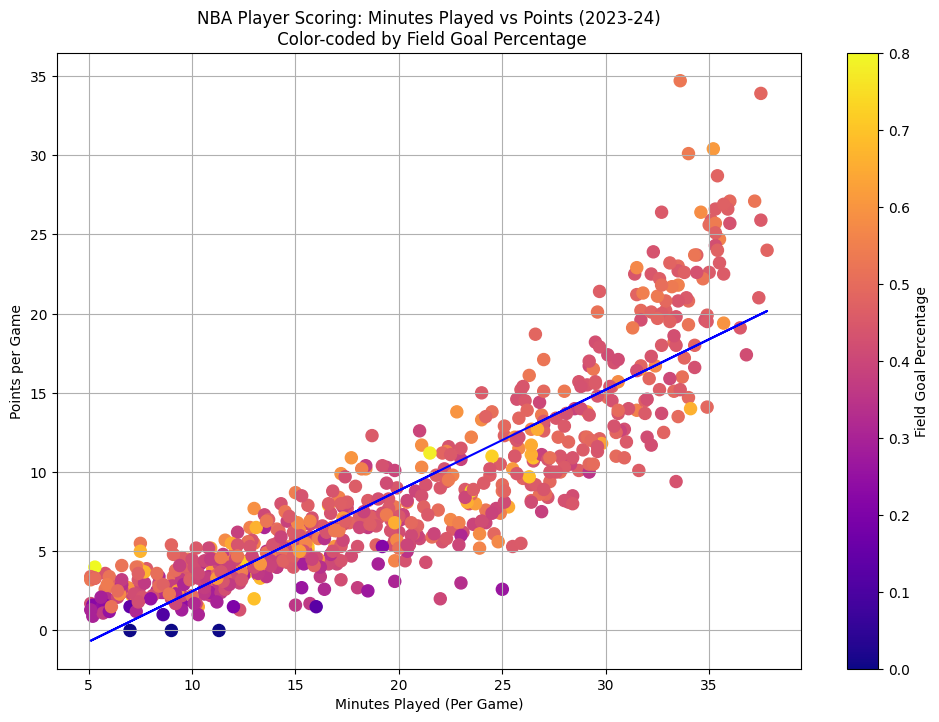

In [50]:
import matplotlib.pyplot as plt
import numpy as np
df_filtered = df[df['MP'] > 5].copy()
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df_filtered['MP'], df_filtered['PTS'], c=df_filtered['FG%'], cmap='plasma',s=75)
z = np.polyfit(df_filtered['MP'], df_filtered['PTS'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['MP'], p(df_filtered['MP']), "b")

plt.colorbar(scatter, label='Field Goal Percentage')
plt.xlabel('Minutes Played (Per Game)')
plt.ylabel('Points per Game')
plt.title('NBA Player Scoring: Minutes Played vs Points (2023-24)\n Color-coded by Field Goal Percentage')
plt.grid(True)
plt.show()

## Plot Summary

Write-up:

The scatter plot above shows the relationship between minutes played and points scored per game in the 2023-24 NBA season, with field goal percentage shown through color coding (darker purple for lower percentages, yellow for higher). There's a clear positive correlation between playing time and scoring, as shown by the blue trend line, with most players falling in the 10-20 minute range and scoring 5-10 points per game. Field goal percentage varies significantly across all minute ranges but is generally around the 50-60% range, and we can see several distinct player groupings: limited-minute role players (5-15 minutes), rotation players (15-25 minutes), and high-minute scorers (25+ minutes). A few notable outliers appear at the top of the plot, representing the league's top scorers who combine high minutes with exceptional scoring output.

## Additional Data Exploration

In [55]:
import seaborn as sns
correlation_metrics = ['MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%']
correlation_matrix = df[correlation_metrics].corr()
correlation_matrix


,MP,PTS,TRB,AST,FG%,3P%,FT%
MP,1.000000,0.886992,0.726708,0.748207,0.312370,0.313735,0.407725
PTS,0.886992,1.000000,0.671586,0.773666,0.311317,0.299486,0.379010
TRB,0.726708,0.671586,1.000000,0.454514,0.466891,0.048226,0.221693
AST,0.748207,0.773666,0.454514,1.000000,0.160834,0.267053,0.308875
FG%,0.312370,0.311317,0.466891,0.160834,1.000000,0.182432,0.266321
3P%,0.313735,0.299486,0.048226,0.267053,0.182432,1.000000,0.289567
FT%,0.407725,0.379010,0.221693,0.308875,0.266321,0.289567,1.000000


I chose some key metrics from the dataset including Minutes Played and Pts Scored and generated a correlation matrix, to see which variables have the greatest correlation with each other. Based on the matrix, minutes played have a 0.87 positive correlation with points scored, which is very strong and confirms the relationship shown by my previous plot. Some other interesting insight is that points scored also has a pretty strong positive correlation with TRB (total rebounds, 0.67) and AST (assists, 0.77), which shows that a good score tend to be a well-rounded player capable of defending and helping teammates too.

In [59]:
high_scorers = df[df['PTS'] >= 20]['MP'].mean()
high_scorers

34.08909090909091

I was also curious to see what's the average minutes played for players who average 20 or higher points per game, whic is considered pretty high in the NBA. The result was around 34 minutes, which means they will be on court for the majority of the games.